#### Problem Statement:
Happy Customer Bank is a mid-sized private bank that deals in all kinds of banking products, like Savings accounts, Current accounts, investment products, credit products, among other offerings.

The bank also cross-sells products to its existing customers and to do so they use different kinds of communication like telecasting, e-mails, recommendations on net banking, mobile banking, etc.

In this case, the Happy Customer Bank wants to cross-sell its credit cards to its existing customers. The bank has identified a set of customers that are eligible for taking these credit cards.

Now, the bank is looking for your help in identifying customers that could show higher intent towards a recommended credit card.

* ID:	Unique Identifier for a row
* Gender:	Gender of the Customer
* Age: Age of the Customer (in Years)
* Region_Code:	Code of the Region for the customers
* Occupation:	Occupation Type for the customer
* Channel_Code:	Acquisition Channel Code for the Customer (Encoded)
* Vintage:	Vintage for the Customer (In Months) - month or quarter in which account was opened (loan/credit card was granted)
* Credit_Product:	If the Customer has any active credit product (Home loan,Personal loan, Credit Card etc.)
* Avg_Account_Balance:	Average Account Balance for the Customer in last 12 Months
* Is_Active:	If the Customer is Active in last 3 Months
* Is_Lead(Target):	If the Customer is interested for the Credit Card , 0 : Customer is not interested , 1 : Customer is interested


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

%matplotlib inline

#### User Defined Functions

In [2]:
def treat_missing_values_num(col_list, data):
    
    for i in col_list:
        col_name = i
        print('Independent Variable: ',col_name)
        print('Check if there are any missing value in variable',col_name,': ')
        if (data[col_name].isnull().any().any() == True):
            print('No. of Observations with missing value: ', data[col_name].isnull().sum(axis=0))
            # Replacing missing values with Median
            data[col_name].fillna(data[col_name].median(), inplace=True)
            print('After treating the missing values')
            print(data[col_name].isnull().sum(axis=0))
            print('')
        else:
            print('No missing values found in ',col_name)
            print('')
   

In [3]:
def treat_missing_values_cat(cat_col_list, data):
    
    for i in cat_col_list:
        col_name = i
        print('Independent Variable: ',col_name)
        print('Check if there are any missing value in variable',col_name,': ')
        if (data[col_name].isnull().any().any() == True):
            print('No. of Observations with missing value: ', data[col_name].isnull().sum(axis=0))
            # Replacing missing values with Mode
            data[col_name].fillna(data[col_name].mode()[0], inplace=True)
            print('After treating the missing values')
            print('No. of Observations with missing value: ', data[col_name].isnull().sum(axis=0))
            print('')
        else:
            print('No missing values found in ',col_name)
            print('')

In [4]:
def check_outliers(df):
    for i in range(df.shape[1]):
        col_name = df.columns[i]
    print("-------#######-------", col_name, "------######------")
    
    ax = sns.boxplot(x = df.columns[i], data = df)
    plt.show()
    sns.distplot(df[col_name], bins=15) 
    plt.show()
    
    q1 = df[col_name].quantile(0.25)
    q2 = df[col_name].quantile(0.50)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    LL = q1 - (1.5*iqr)
    UL = q3 + (1.5*iqr)
    print('Q1: ', q1)
    print('Q2: ', q2)
    print('Q3: ', q3)
    print('IQR: ', iqr)
    print('Lower Level: ', LL)
    print('Upper Level: ', UL)     
    print('     ')

### Step 1: Data

In [5]:
cc_data_train = pd.read_csv(r'C:\Users\RONALD\Desktop\IMS-Classroom\Python Code\Resume Project - ML Algo\Credit Card Lead Prediction\archive\Train_Data.csv')

##### 1.a) Data Overview

##### Train Data

In [6]:
cc_data_train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [7]:
cc_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [8]:
cc_data_train.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [9]:
cc_data_train.describe(include = np.object)

,ID,Gender,Region_Code,Occupation,Channel_Code,Credit_Product,Is_Active
count,245725,245725,245725,245725,245725,216400,245725
unique,245725,2,35,4,4,2,2
top,3KQTZBHP,Male,RG268,Self_Employed,X1,No,No
freq,1,134197,35934,100886,103718,144357,150290


#### Step 2: Data Cleaning & Formatting

##### a) Missing Values Identification & treatment

##### Train Data

In [10]:
cc_data_train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [11]:
cc_data_train['Credit_Product'].fillna(cc_data_train['Credit_Product'].mode()[0], inplace=True)

In [12]:
cc_data_train.isnull().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

In [13]:
cc_data_train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


#### saving the ready data for visualization

cc_data_train.to_csv(r'C:\Users\RONALD\Desktop\IMS-Classroom\Python Code\Resume Project - ML Algo\Credit Card Lead Prediction\archive\Data_visualize.csv')


In [14]:
num_data = cc_data_train[cc_data_train.select_dtypes(include=[np.number]).columns.tolist()]
cat_data = cc_data_train[cc_data_train.select_dtypes(exclude=[np.number]).columns.tolist()]

In [15]:
num_data.columns

Index(['Age', 'Vintage', 'Avg_Account_Balance', 'Is_Lead'], dtype='object')

In [16]:
cat_data.columns

Index(['ID', 'Gender', 'Region_Code', 'Occupation', 'Channel_Code',
       'Credit_Product', 'Is_Active'],
      dtype='object')

In [17]:
cat_data.apply(lambda x: len(x.unique()))   ##check unique values in categorical variable.

ID                245725
Gender                 2
Region_Code           35
Occupation             4
Channel_Code           4
Credit_Product         2
Is_Active              2
dtype: int64

In [18]:
#Filter categorical variables - [x for x in data.dtypes.index if data.dtypes[x]=='object']
cat_columns = cat_data.copy()
#Exclude ID cols :
cat_columns = [x for x in cat_columns if x not in ['ID']]
#Print frequency of categories
for col in cat_columns:
    print ('\nFrequency of Categories for variable: ', col)
    print("Count of unique values :", len(set( cc_data_train[col])))
    print (cc_data_train[col].value_counts())
    print("================================")



Frequency of Categories for variable:  Gender
Count of unique values : 2
Male      134197
Female    111528
Name: Gender, dtype: int64

Frequency of Categories for variable:  Region_Code
Count of unique values : 35
RG268    35934
RG283    29416
RG254    26840
RG284    19320
RG277    12826
RG280    12775
RG269     7863
RG270     7720
RG261     7633
RG257     6101
RG251     5950
RG282     5829
RG274     5286
RG272     5252
RG281     5093
RG273     4497
RG252     4286
RG279     3976
RG263     3687
RG275     3245
RG260     3110
RG256     2847
RG264     2793
RG276     2764
RG259     2586
RG250     2496
RG255     2018
RG258     1951
RG253     1858
RG278     1822
RG262     1788
RG266     1578
RG265     1546
RG271     1542
RG267     1497
Name: Region_Code, dtype: int64

Frequency of Categories for variable:  Occupation
Count of unique values : 4
Self_Employed    100886
Salaried          71999
Other             70173
Entrepreneur       2667
Name: Occupation, dtype: int64

Frequency of Categorie

### Info about bank customers

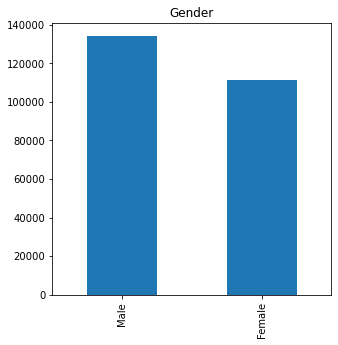

In [19]:
cc_data_train['Gender'].value_counts().plot.bar(figsize=(5,5),title='Gender')

    Inference: The bank dataset has more Male customers than Female customers

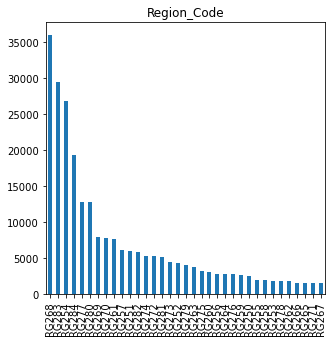

In [20]:
cc_data_train['Region_Code'].value_counts().plot.bar(figsize=(5,5),title='Region_Code')

    * The top 6 Region_codes from where the customers belong are:
        RG268    35934
        RG283    29416
        RG254    26840
        RG284    19320
        RG277    12826

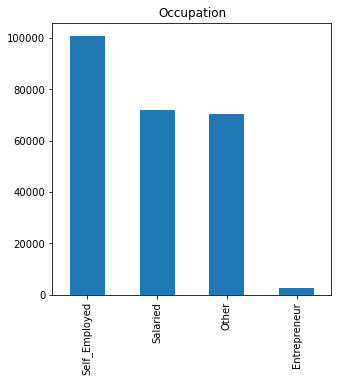

In [21]:
cc_data_train['Occupation'].value_counts().plot.bar(figsize=(5,5),title='Occupation')

    * Maximum no. of customers of the ban are Self_employed. 
    * Second highest customers are Salaried.
    * There are lesser no. of customers who are Enterpreneurs.

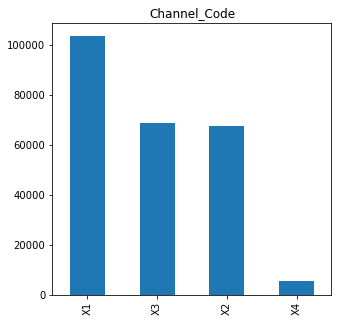

In [22]:
cc_data_train['Channel_Code'].value_counts().plot.bar(figsize=(5,5),title='Channel_Code')

    * Channel_code with maximum customer acquisition is X1. 
    * Channel_code with lowest customer acquisition is X4

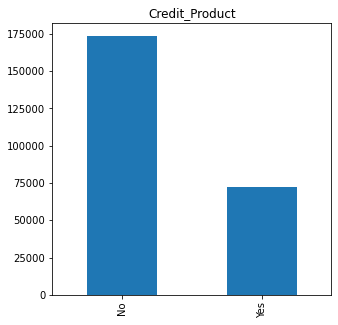

In [23]:
cc_data_train['Credit_Product'].value_counts().plot.bar(figsize=(5,5),title='Credit_Product')

    * Most of the existing ban customers are NOT having any active credit product lie home loan/ personal loan etc.

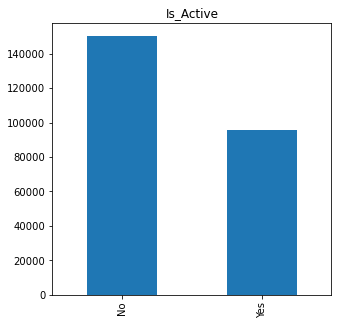

In [24]:
cc_data_train['Is_Active'].value_counts().plot.bar(figsize=(5,5),title='Is_Active')

    * Most of the ban customers are not active since last 3 months

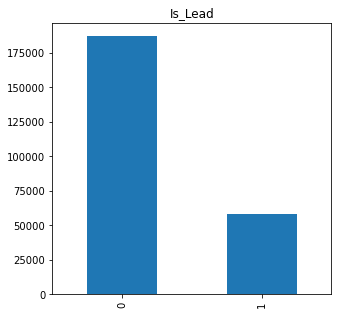

In [26]:
cc_data_train['Is_Lead'].value_counts().plot.bar(figsize=(5,5),title='Is_Lead')

    * Most of ban customers are not interested in credit card

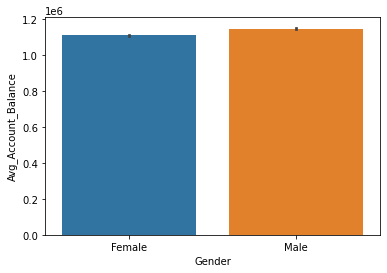

In [27]:
sns.barplot(x = cc_data_train['Gender'], y = cc_data_train['Avg_Account_Balance'])

    * Avg Account Balance of Male customers are slightly higher than the female customers.

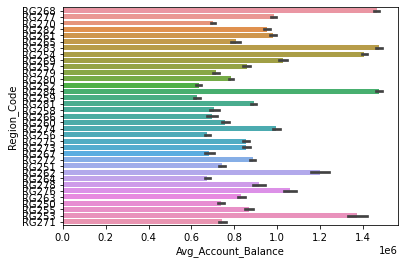

In [32]:
sns.barplot(y = cc_data_train['Region_Code'], x = cc_data_train['Avg_Account_Balance'])

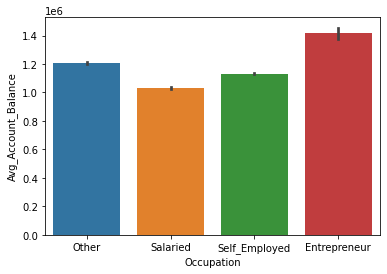

In [33]:
sns.barplot(x = cc_data_train['Occupation'], y = cc_data_train['Avg_Account_Balance'])

    * Even though the ban has majority of Self-employed customers, the Avg Account Balance is highest for the small group of customers - Enterpreneurs. Enterpreneurs are highest Avg Account Balance Holders as compared to ban customers from other occupation.

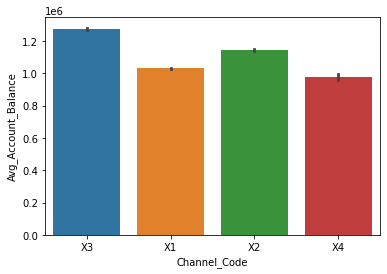

In [34]:
sns.barplot(x = cc_data_train['Channel_Code'], y = cc_data_train['Avg_Account_Balance'])

    * Customers from second highest acquisition channel (X3) have highest Av6g Account Balance
    * Ban's second best acquisition channel mode have the highest Avg Account Balance

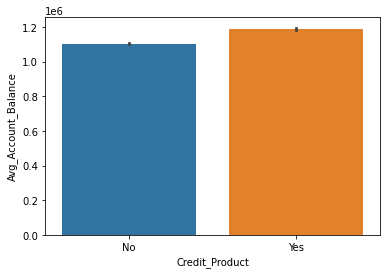

In [35]:
sns.barplot(x = cc_data_train['Credit_Product'], y = cc_data_train['Avg_Account_Balance'])

    * Customers with active credit product have the more Avg Account Balance than those without credit product

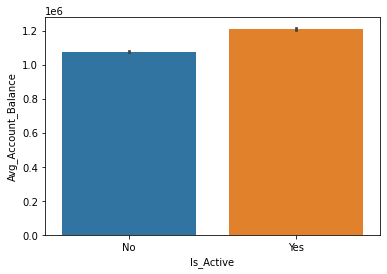

In [36]:
sns.barplot(x = cc_data_train['Is_Active'], y = cc_data_train['Avg_Account_Balance'])

    * Customers who are active in last 3 months have comparetively higher Avg Account Balance than those been inactive

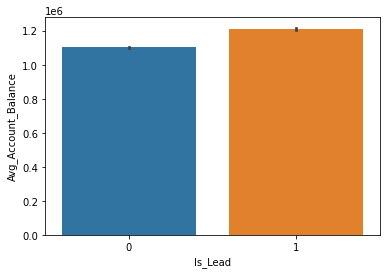

In [37]:
sns.barplot(x = cc_data_train['Is_Lead'], y = cc_data_train['Avg_Account_Balance'])

    * Customers who are interested in Credit card have higher Avg Account Balance than the ones who are not interested

### Bivariate Analysis

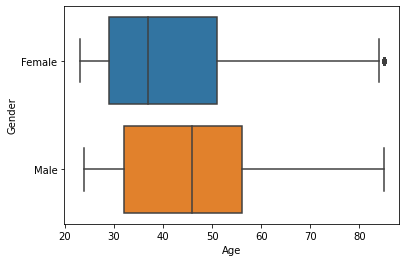

In [38]:
sns.boxplot(y = cc_data_train['Gender'], x = cc_data_train['Age'])

    Inference:
    * Compare Medians/Location: The median Age of Male customers is greater than that of female customers.
    * Compare IQR(Box Length)/Dispersion: The Interquartile range for both the groups are reasonably similar.
    * Overall Spread/Range: The overall range or spread of data for both the group is reasonable similar.The inclusion of outlier in the female group will bring it closer to the adjacent values(upper) of the Male group
    * Sewness Pattern: Both groups of the data appears to be right sewed, due to its longer tails towards right. But the female group is slightly more sewed than that of Male group. Even inclusion of the potential outliers in the group will not mae much impact on its sewness.
    * Potential Outliers: The overall range for the Female group will be similar to that of Male group, even if the outliers are included.
    
    Conclusion: In the ban's customer dataset irrespective of lead or not - 
    1. Avg age of the Male customer is ~45. This is more than the Avg age of female customer viz. ~35.
    2. 75th percent of the Male customers are below 55 & below 50 for female customers.
    3. Overall the two groups of the data appears to be distributed in similar ways and there is liely not much difference between the groups. 
    4. The data of the female group is slightly more sewed on right than the Male group, as female of higher age group are less in number.

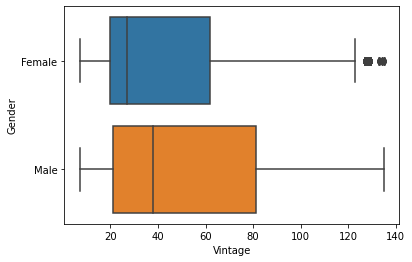

In [39]:
sns.boxplot(y = cc_data_train['Gender'], x = cc_data_train['Vintage'])

    Inference:
    * Compare Medians/Location: The median vintage months of Male customers (~40) is greater than that of female customers(~30). Median vintage months for female customers are slightly more than the lower quartile of the male customers boxplot.
    * Compare IQR(Box Length)/Dispersion: The Interquartile range for male customers are more as compared to female customers. hence data for Male customers is more dispersed than the female customers. 
    * Overall Spread/Range: The overall range or spread of data for both the group is reasonable similar.The inclusion of outlier in the female group will bring it closer to the adjacent values(upper) of the Male group. If outliers are excluded then we can conclude that Male customer has more scattered data than female customers.
    * Sewness Pattern: Both groups of the data appears to be right sewed, due to its longer tails towards right. But the female group is slightly more sewed than that of Male group. With inclusion of the potential outliers in the female group it will be approximately closer to adjacent values of the Male group.
    * Potential Outliers: The overall range for the Female group will be similar to that of Male group, even if the outliers are included.
    
    Conclusion: Overall distribution of data for both the groups is similar. 75% of the customers have vintage months below 80 months which is way higher than female group(75% of customers have vintage months below 60). Avg vintage month for MAle and female group is >40 and ~30 respectively. hence not much variation.
    The female group is slightly more right sewed than the Male group.

sns.boxplot(y = cc_data_train['Gender'], x = cc_data_train['Avg_Account_Balance'])

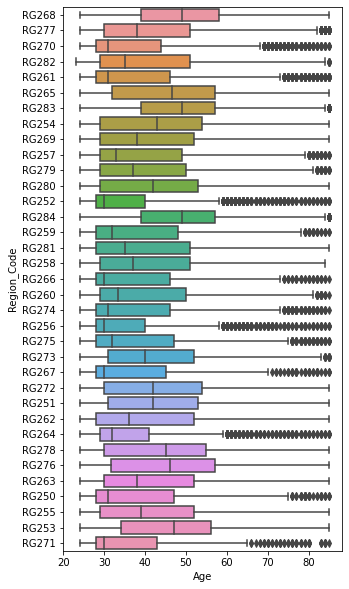

In [134]:
sns.boxplot(y = cc_data_train['Region_Code'], x = cc_data_train['Age'])

    * The avg age of customers of these region codes is varied between ~30 and ~50.
    * The interquartile range of the box plots are similr for most of the region codes. As we observe that boxplot of majority of the region codes are longer - which implies the data is more dispersed for these region codes.
    * Sewness: Most of the region codes have right sewed distribution of data.
    * If outliers are included in the data then range of the data is distributed similarly for most of the cases. The adjacent value or upper whiser for almost all the boxplot is at same level.

sns.countplot(y='Region_Code',x ='Age',data=cc_data_train)
sns.set(rc={'figure.figsize':(10,10)})
plt.xticks(rotation=90)
plt.title('Medals by Gender in each Discipline')
plt.legend(loc=1)  # 1 is code for 'upper right'3

from pylab import rcParams
rcParams['figure.figsize'] = 5, 10

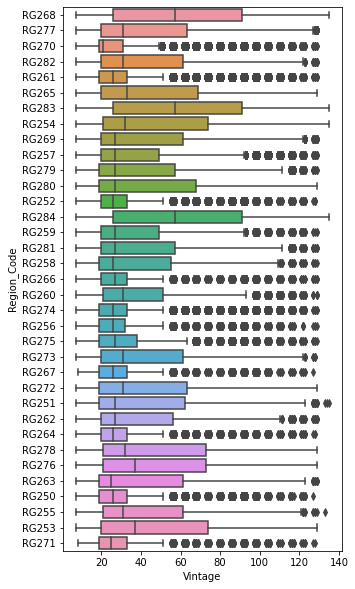

In [135]:
sns.boxplot(y = cc_data_train['Region_Code'], x = cc_data_train['Vintage'])

    * Avg vintage month for customers for various region code is less varied as they are ~30. The range of the region codes are more scattered and match adjacent values - its true only if outliers are included in the data

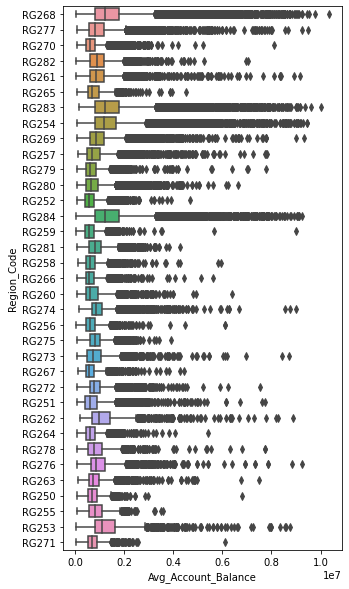

In [136]:
sns.boxplot(y = cc_data_train['Region_Code'], x = cc_data_train['Avg_Account_Balance'])

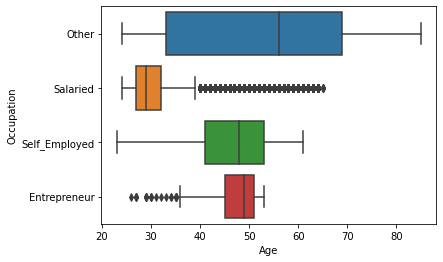

In [44]:
sns.boxplot(y = cc_data_train['Occupation'], x = cc_data_train['Age'])

    *There is difference in age between customers from different occupation.
    *Data for occupation 'other' is more dispersed than other occupation.
    *Salaried-entrepreneur and self employed data is skewed. Salaried - right sewed; selfemployed-left sewed; entrepreneur-left sewed.

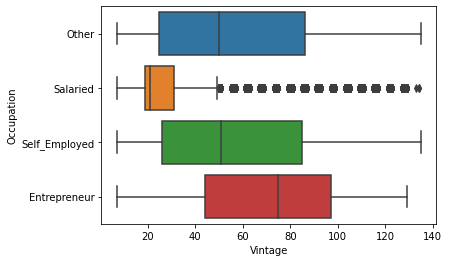

In [45]:
sns.boxplot(y = cc_data_train['Occupation'], x = cc_data_train['Vintage'])

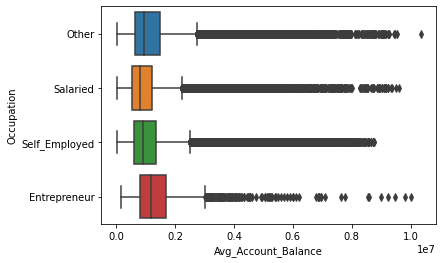

In [46]:
sns.boxplot(y = cc_data_train['Occupation'], x = cc_data_train['Avg_Account_Balance'])

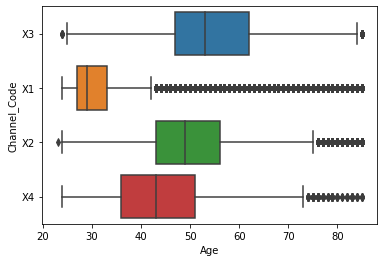

In [47]:
sns.boxplot(y = cc_data_train['Channel_Code'], x = cc_data_train['Age'])

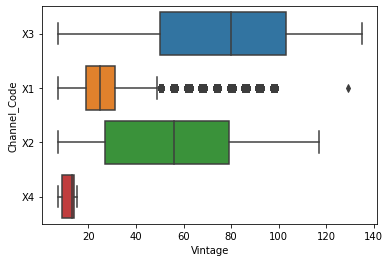

In [48]:
sns.boxplot(y = cc_data_train['Channel_Code'], x = cc_data_train['Vintage'])

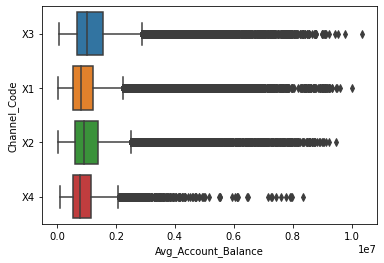

In [49]:
sns.boxplot(y = cc_data_train['Channel_Code'], x = cc_data_train['Avg_Account_Balance'])

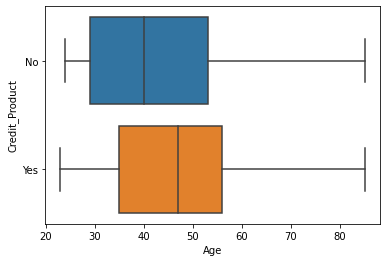

In [50]:
sns.boxplot(y = cc_data_train['Credit_Product'], x = cc_data_train['Age'])

    Inference:
    * Compare Medians/Location: The median age of active CP customers (~50) is greater than that of inactive cp customers(~40). 
    * Compare IQR(Box Length)/Dispersion: The Interquartile range for not active cp customers are more as compared to active cp customers. hence data for not active cp customers is more dispersed than the active cp customers. 
    * Overall Spread/Range: The overall range or spread of data for both the group is reasonable similar.
    * Sewness Pattern: The data of not active cp customer appears to be right sewed, due to its longer tails towards right. But the active cp customer group appears to be slightly right sewed distributed. 
    * Potential Outliers: None
    
    Conclusion: Overall distribution of data for both the groups is similar. 75% of the customers have age below 55  which is somewhat similar to not active cp customer group(75% of customers have age below ~53). Avg age for active cp and not active cp customer group is ~47 and 40 respectively. hence not much variation.
    The not active cp customer group is  more right sewed than the active cp group.

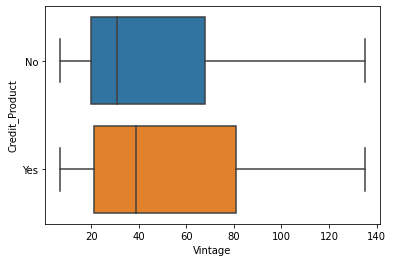

In [51]:
sns.boxplot(y = cc_data_train['Credit_Product'], x = cc_data_train['Vintage'])

    Inference:
    * Compare Medians/Location: The median vintage months of active CP customers (~40) is greater than that of inactive cp customers(~30). 
    * Compare IQR(Box Length)/Dispersion: The Interquartile range for not active cp customers are less as compared to active cp customers. hence data for active cp customers is more dispersed than the not active cp customers. 
    * Overall Spread/Range: The overall range or spread of data for both the group is reasonable similar.
    * Sewness Pattern: The data of not active cp customer appears to be right sewed, due to its longer tails towards right. But the active cp customer group appears to be slightly right sewed distributed. 
    * Potential Outliers: None
    
    Conclusion: Overall distribution of data for both the groups is similar. 75% of the customers have vintage months below 80  which is somewhat similar to not active cp customer group(75% of customers have age below ~65). Avg vintage months for active cp and not active cp customer group is ~40 and ~30 respectively. hence not much variation.
    The not active cp customer group is  more right sewed than the active cp group.

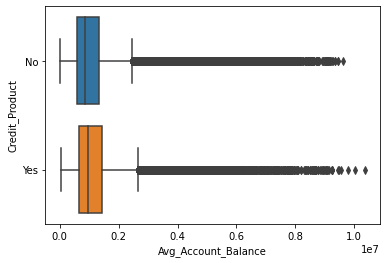

In [52]:
sns.boxplot(y = cc_data_train['Credit_Product'], x = cc_data_train['Avg_Account_Balance'])

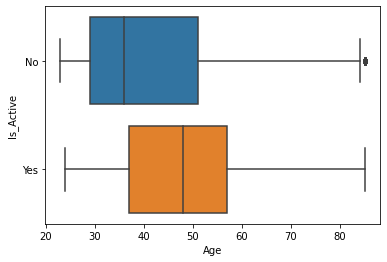

In [53]:
sns.boxplot(y = cc_data_train['Is_Active'], x = cc_data_train['Age'])

    Inference:
        * Compare Medians/Location: The median age of active customers (~50) is greater than that of inactive customers (~35). Its median equals the lower quartile of active customer.
        * Compare IQR(Box Length)/Dispersion: The Interquartile range for inactive customers is more as compared to active customers. hence data for inactive customers is more dispersed than the active customers. 
    * Overall Spread/Range: The overall range or spread of data for both the group is reasonable similar.The inclusion of outlier in the inactive group will bring it closer to the adjacent values(upper) of the active group. 
    * Sewness Pattern: Both groups of the data appears to be right sewed, due to its longer tails towards right. But the inactive group is more right sewed than that of active group. With inclusion of the potential outliers in the inactive group it will be approximately closer to adjacent values of the active group.
    * Potential Outliers: The overall range for the inactive group will be similar to that of active group, even if the outliers are included.
    
    Conclusion: Overall distribution of data for both the groups is similar. 75% of the active customers have age ~57  which is way higher than that of inactive group(75% of inactive customers have age below 50). Avg age for active customers and inactive customers is ~47 and ~35 respectively. hence slight variation.
    The inactive customer group is slightly more right sewed than the active customer group.

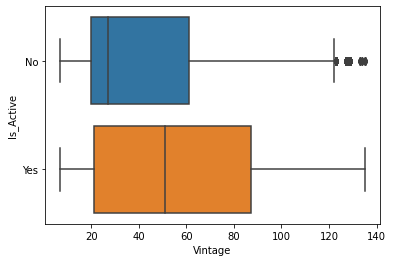

In [54]:
sns.boxplot(y = cc_data_train['Is_Active'], x = cc_data_train['Vintage'])

    Inference:
    * Compare Medians/Location: The median vintage months of active customers (~45) is greater than that of inactive customers(below 30). Median vintage months for inactive customers is slightly higher than the lower quartile of the active customers boxplot. The Lower quartile for both the groups are same.
    * Compare IQR(Box Length)/Dispersion: The Interquartile range for active customers are more as compared to inactive customers. hence data for active customers is more dispersed than the inactive customers. 
    * Overall Spread/Range: The overall range or spread of data for both the group is reasonable similar.The inclusion of outlier in the inactive group will bring it closer to the adjacent values(upper) of the active group. If outliers are excluded then we can conclude that active customer has more scattered data than inactive customers.
    * Sewness Pattern: Both groups of the data appears to be right sewed, due to its longer tails towards right. But the inactive group is slightly more right sewed than that of active group. With inclusion of the potential outliers in the inactive group it will be approximately closer to adjacent values of the active group.
    * Potential Outliers: The overall range for the inactive group will be similar to that of active group, even if the outliers are included.
    
    Conclusion: Overall distribution of data for both the groups is similar. 75% of the customers have vintage months below 90 months which is way higher than inactive group(75% of customers have vintage months below 60). Avg vintage month for active and inactive group is ~50 and ~30 respectively. hence not much variation.
    The inactive group is slightly more right sewed than the active group.

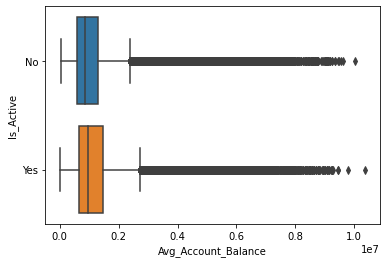

In [55]:
sns.boxplot(y = cc_data_train['Is_Active'], x = cc_data_train['Avg_Account_Balance'])

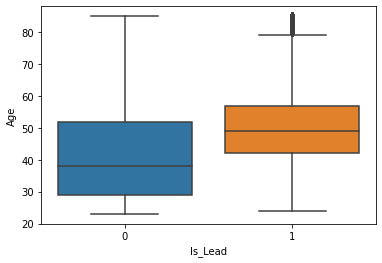

In [58]:
sns.boxplot(x= cc_data_train['Is_Lead'], y = cc_data_train['Age'])

    Inference:
    * Compare Medians/Location: The median age of interested customers (~50) is greater than that of not interested customers(~40). Median age for not interested customers are slightly less than the lower quartile of the interested customers boxplot.
    * Compare IQR(Box Length)/Dispersion: The Interquartile range for not interested customers are more as compared to interested customers. hence data for not interested customers is more dispersed than the interested customers. 
    * Overall Spread/Range: The overall range or spread of data for both the group is reasonable similar.The inclusion of outlier in the interested group will bring it closer to the adjacent values(upper) of the not interested group. If outliers are excluded then we can conclude that not interested customer has more scattered data than interested customers.
    * Sewness Pattern: The data of not interested customer appears to be right sewed, due to its longer tails towards right. But the interested customer group appears to be normally distributed. With inclusion of the potential outliers in the interested customer group it will be approximately closer to adjacent values of the not interested group.
    * Potential Outliers: The overall range for the interested customer group will be similar to that of not interested customer group, even if the outliers are included.
    
    Conclusion: Overall distribution of data for both the groups is similar. 75% of the customers have age below 60  which is way higher than not interested customer group(75% of customers have age below 50). Avg age for interested and not interested customer group is 50 and 430 respectively. hence not much variation.
    The not interested customer group is  more right sewed than the interested group.

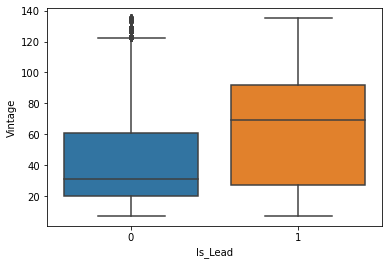

In [59]:
sns.boxplot(x = cc_data_train['Is_Lead'], y = cc_data_train['Vintage'])

    Inference:
    * Compare Medians/Location: The median vintage months of interested customers (~70) is greater than that of not interested customers(~30). Median vintage months for not interested customers is similar to the lower quartile of the interested customers boxplot.
    * Compare IQR(Box Length)/Dispersion: The Interquartile range for not interested customers are less as compared to interested customers. hence data for interested customers is more dispersed than the not interested customers. 
    * Overall Spread/Range: The overall range or spread of data for both the group is reasonable similar.The inclusion of outlier in the not interested group will bring it closer to the adjacent values(upper) of the interested group. If outliers are excluded then we can conclude that interested customer has more scattered data than not interested customers.
    * Sewness Pattern: The data of not interested customer appears to be right sewed, due to its longer tails towards right. But the interested customer group appears to be almost normally distributed. With inclusion of the potential outliers in the not interested customer group it will be approximately closer to adjacent values of the interested group.
    * Potential Outliers: The overall range for the not interested customer group will be similar to that of interested customer group, even if the outliers are included.
    
    Conclusion: Overall distribution of data for both the groups is similar. 75% of the customers have vintage months below 90  which is way higher than not interested customer group(75% of customers have age below 60). Avg vintage months for interested and not interested customer group is 70 and 30 respectively. hence there is variation.
    The not interested customer group is  more right sewed than the interested group.

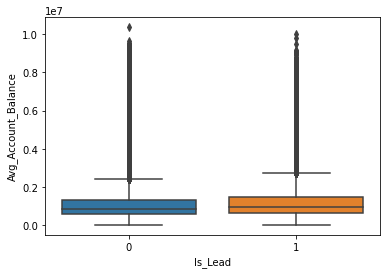

In [60]:
sns.boxplot(x = cc_data_train['Is_Lead'], y = cc_data_train['Avg_Account_Balance'])

### Lets look into details of customers who are interested in credit cards

    which gender is interested in cc?

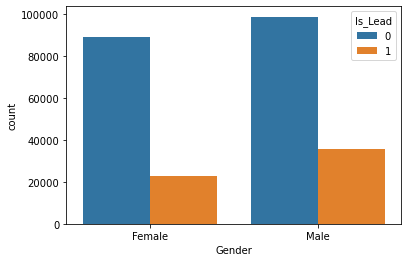

In [63]:
sns.countplot(x = 'Gender', hue = 'Is_Lead', data=cc_data_train)

    Out of the two - Males are comparatively more interested in credit card than female.

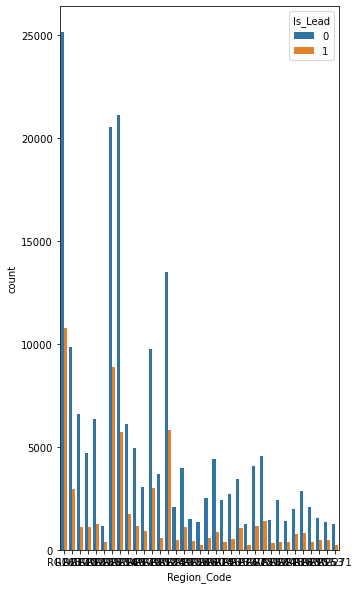

In [137]:
sns.countplot(x = 'Region_Code', hue = 'Is_Lead', data=cc_data_train)

    *

    customers of which occupation are interested in CC?

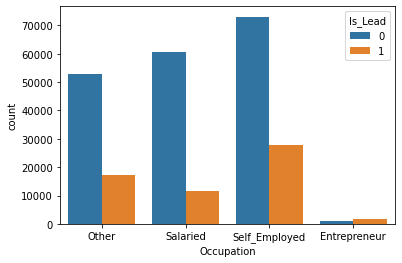

In [65]:
sns.countplot(x = 'Occupation', hue = 'Is_Lead', data=cc_data_train)

    * Self-employed customers are more interested in credit card than other occupations. Customers with 'Other' occupation are also interested in credit card but lesser in comparison to Slef-Employed.
    Enterpreneurs are least interested in credit card.

    customers from which channel code are more interested in CC?

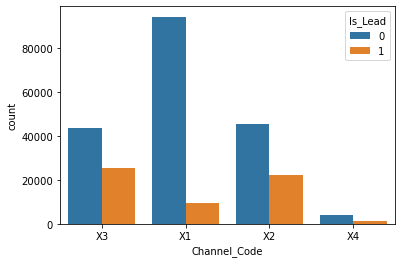

In [66]:
sns.countplot(x = 'Channel_Code', hue = 'Is_Lead', data=cc_data_train)

    * Customers acquired through Channel codes X3 and X2 are the more interested in credit card than customers from other channel codes.

    Do Customers interested in CC have any credit product?

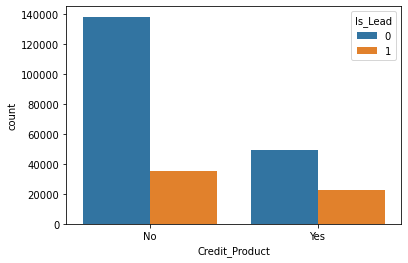

In [67]:
sns.countplot(x = 'Credit_Product', hue = 'Is_Lead', data=cc_data_train)

    * Customers without any active Credit Product were more interested in credit card than those who with credit products.

    Are active customers interested in CC?

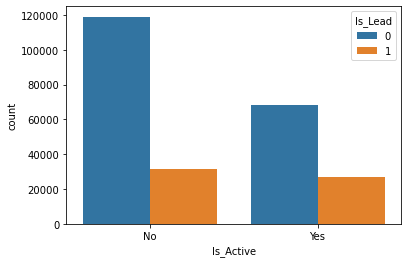

In [68]:
sns.countplot(x = 'Is_Active', hue = 'Is_Lead', data=cc_data_train)

    * The customers who were not active in last 3 months are more interested in credit card than active customers.

### Checing relation between variables for more information

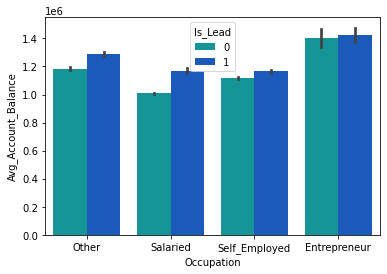

In [129]:
sns.barplot(x='Occupation',y='Avg_Account_Balance',hue = 'Is_Lead', data=cc_data_train, palette='winter_r')

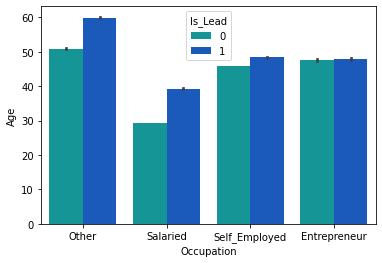

In [128]:
sns.barplot(x='Occupation',y='Age',hue = 'Is_Lead', data=cc_data_train, palette='winter_r')

    1. Self-Employed 

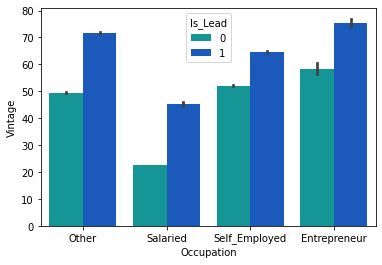

In [127]:
sns.barplot(x='Occupation',y='Vintage',hue = 'Is_Lead', data=cc_data_train, palette='winter_r')

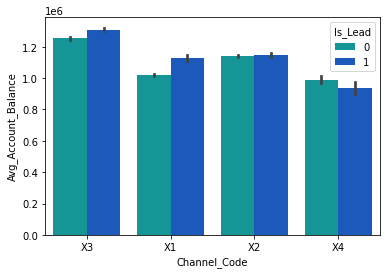

In [126]:
sns.barplot(x='Channel_Code',y='Avg_Account_Balance',hue = 'Is_Lead', data=cc_data_train, palette='winter_r')

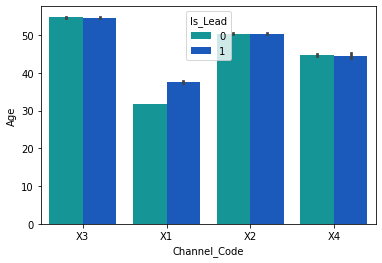

In [125]:
sns.barplot(x='Channel_Code',y='Age',hue = 'Is_Lead', data=cc_data_train, palette='winter_r')

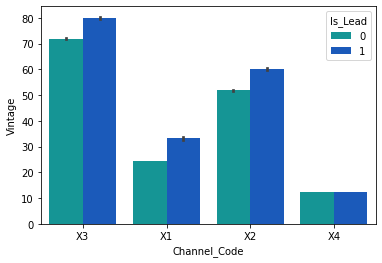

In [124]:
sns.barplot(x='Channel_Code',y='Vintage',hue = 'Is_Lead', data=cc_data_train, palette='winter_r')

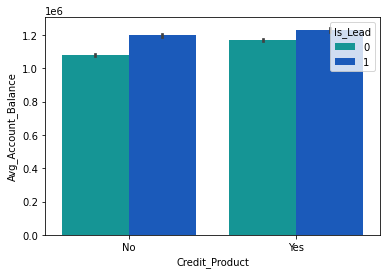

In [123]:
sns.barplot(x='Credit_Product',y='Avg_Account_Balance',hue = 'Is_Lead', data=cc_data_train, palette='winter_r')

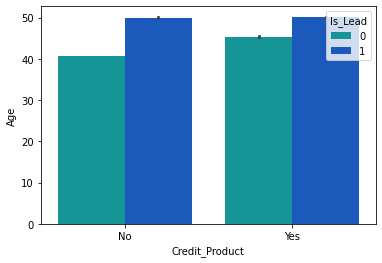

In [122]:
sns.barplot(x='Credit_Product',y='Age',hue = 'Is_Lead', data=cc_data_train, palette='winter_r')

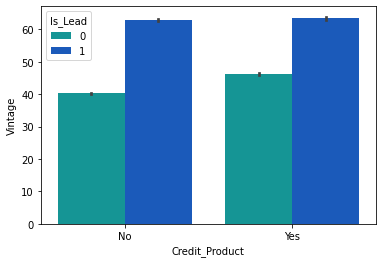

In [121]:
sns.barplot(x='Credit_Product',y='Vintage',hue = 'Is_Lead', data=cc_data_train, palette='winter_r')

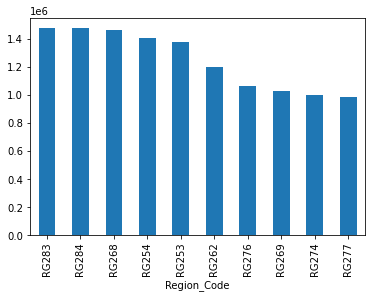

In [120]:
cc_data_train.groupby('Region_Code').Avg_Account_Balance.mean().sort_values(ascending=False)[:10].plot.bar()

    Inference:
    Region code RG283 have maximum avg account balance

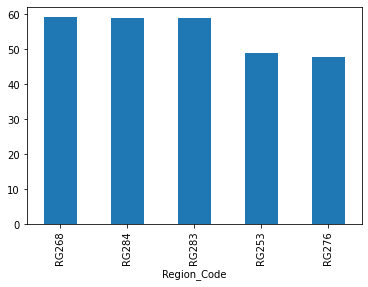

In [130]:
cc_data_train.groupby('Region_Code').Vintage.mean().sort_values(ascending=False)[:5].plot.bar()

    *Customers from Region code RG268 RG284 RG283 (all 3) have highest average vintage ~ 6o months

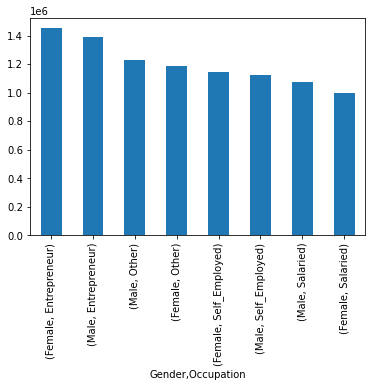

In [131]:
cc_data_train.groupby(['Gender','Occupation']).Avg_Account_Balance.mean().sort_values(ascending=False)[:10].plot.bar()

    * Female Enerpreneurs are having the highest average account balance. Male Enterpreneurs closely follow the suit of being the second highest average account balance.

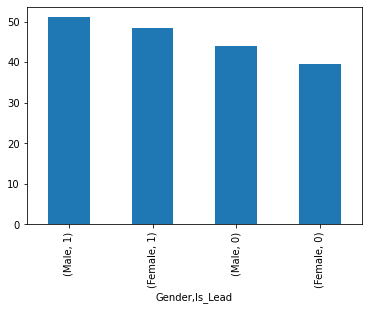

In [73]:
cc_data_train.groupby(['Gender','Is_Lead']).Age.mean().sort_values(ascending=False)[:10].plot.bar()

    *Average age of Male customers who are interested in credit card is 50. Whereas avg age of female customers interested in CC is ~50.

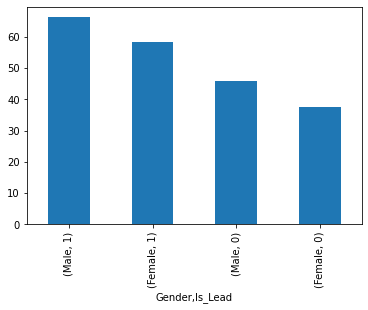

In [74]:
cc_data_train.groupby(['Gender','Is_Lead']).Vintage.mean().sort_values(ascending=False)[:10].plot.bar()

    * Avg Vintage (in months) for Male customers interested in CC is 60+. Closely following them are interested female customers with vintage ~55 months

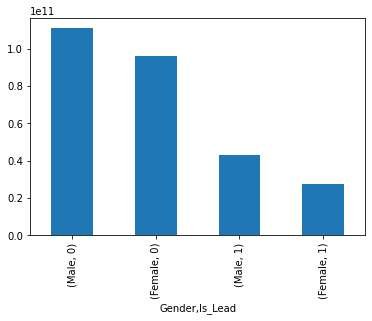

In [75]:
cc_data_train.groupby(['Gender','Is_Lead']).Avg_Account_Balance.sum().sort_values(ascending=False)[:10].plot.bar()

    * Avg account balance for Male and female customers, who are interested in CC, are the lowest ~ 0.4E^11 & ~0.3E^11 as compared to non interested customers

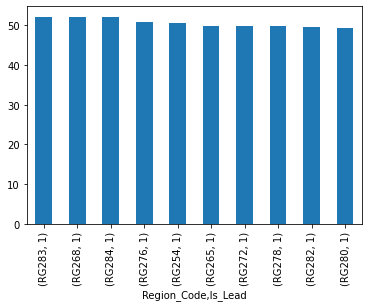

In [76]:
cc_data_train.groupby(['Region_Code','Is_Lead']).Age.mean().sort_values(ascending=False)[:10].plot.bar()

    *

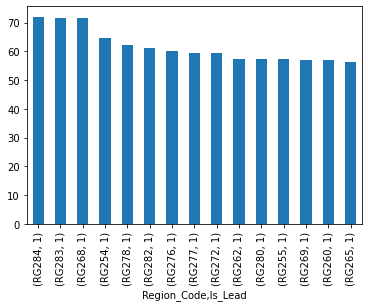

In [78]:
cc_data_train.groupby(['Region_Code','Is_Lead']).Vintage.mean().sort_values(ascending=False)[:15].plot.bar()

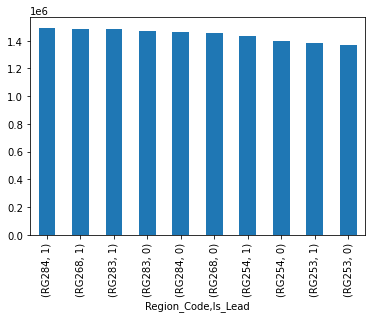

In [80]:
cc_data_train.groupby(['Region_Code','Is_Lead']).Avg_Account_Balance.mean().sort_values(ascending=False)[:10].plot.bar()

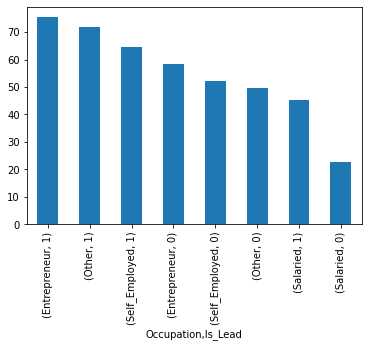

In [81]:
cc_data_train.groupby(['Occupation','Is_Lead']).Vintage.mean().sort_values(ascending=False)[:10].plot.bar()

    * MAx avg vintage in months are for customers (interested in CC) with occupation as Enterpreneurs is ~75. Other occupation which closely follows it are- Other Self-Employed

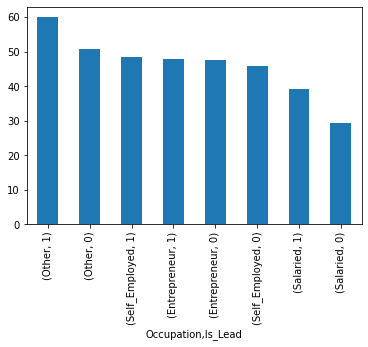

In [82]:
cc_data_train.groupby(['Occupation','Is_Lead']).Age.mean().sort_values(ascending=False)[:10].plot.bar()

    *Avg age of customers who are interested in CC is - 60 from occupation 'other'. Closely following it are customers from occupations - Self Employed and Enterpreneurs with avg age ~50 for both

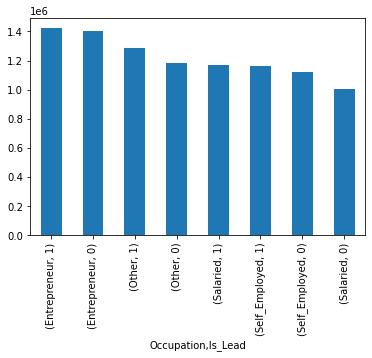

In [83]:
cc_data_train.groupby(['Occupation','Is_Lead']).Avg_Account_Balance.mean().sort_values(ascending=False)[:10].plot.bar()

    *Customers who are interested in CC and have occupation as Entrepreneur have highest avg account balance ~1.4E^11. Customers with occupation from Salaried Selfemployed and other have avg account balance less than Entrepreneurs

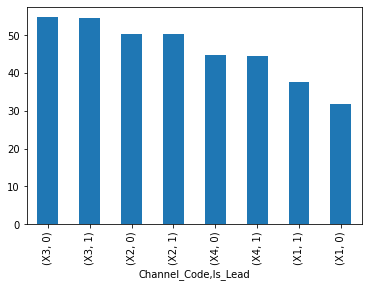

In [84]:
cc_data_train.groupby(['Channel_Code','Is_Lead']).Age.mean().sort_values(ascending=False)[:10].plot.bar()

    *Customers - interested in CC and from acquisition channels X3 & X2 have avg age >50. Interested customers acquired from X4 & X1 have avg age as - ~45 and ~40 respt.

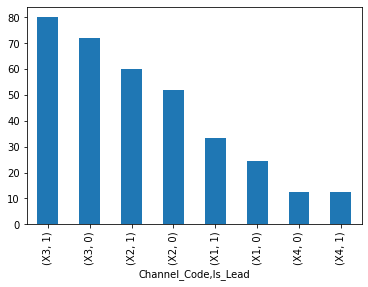

In [85]:
cc_data_train.groupby(['Channel_Code','Is_Lead']).Vintage.mean().sort_values(ascending=False)[:10].plot.bar()

    * Avg vintage months for interested customers from channel code X3 is ~80 and for channel code X2 ~60. For customers acquired from X1 and X4 are ~30 and ~10 respt which are comparetively lesser than X3 & X2

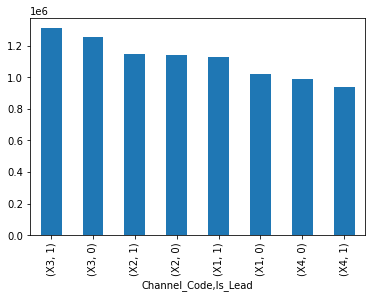

In [86]:
cc_data_train.groupby(['Channel_Code','Is_Lead']).Avg_Account_Balance.mean().sort_values(ascending=False)[:10].plot.bar()

    * Avg account balance for interested customers from channel code is higher for X3 in comparison to X2-X1-X4. Avg account balance is approx similar for customers with channel code - X2 and X1

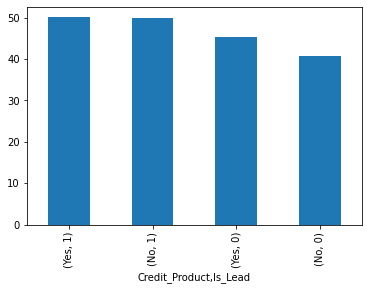

In [88]:
cc_data_train.groupby(['Credit_Product','Is_Lead']).Age.mean().sort_values(ascending=False)[:10].plot.bar()

    *Avg age of interested customers with existing credit product is ~50. Also for non interested customers is ~50.

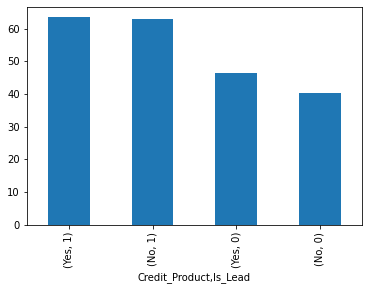

In [89]:
cc_data_train.groupby(['Credit_Product','Is_Lead']).Vintage.mean().sort_values(ascending=False)[:10].plot.bar()

    * Avg vintage months for interested customers with active credit product is >60 months slightly higher than the interested customers but with no active credit product

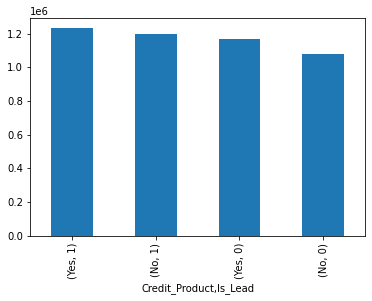

In [90]:
cc_data_train.groupby(['Credit_Product','Is_Lead']).Avg_Account_Balance.mean().sort_values(ascending=False)[:10].plot.bar()

    *Avg account balance of interested customers with active credit product is slightly higher than the interested customers with non-active credit products
    

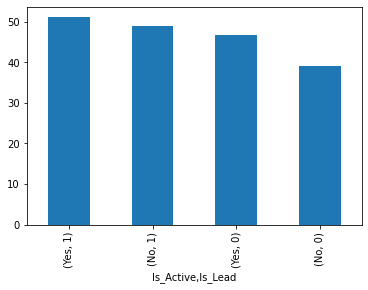

In [91]:
cc_data_train.groupby(['Is_Active','Is_Lead']).Age.mean().sort_values(ascending=False)[:10].plot.bar()

    *Interested and active customers avg age is ~50 i.e. slightly higher than the interested yet non-active customers

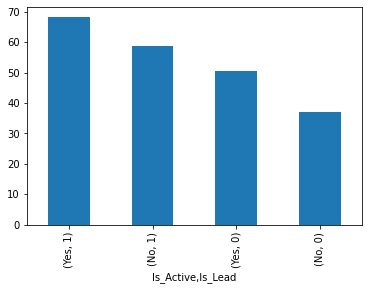

In [92]:
cc_data_train.groupby(['Is_Active','Is_Lead']).Vintage.mean().sort_values(ascending=False)[:10].plot.bar()

    *Interested and active customers have avg vintage of ~70 months which is slightly higher than interested and non-active customers with avg vintage months of ~60.

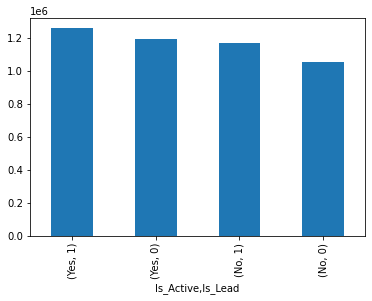

In [93]:
cc_data_train.groupby(['Is_Active','Is_Lead']).Avg_Account_Balance.mean().sort_values(ascending=False)[:10].plot.bar()

    * interested and active customers have avg account balance of >1.2E^6 which is slightly higher than the interested yet non active customers

### More about customer bacground

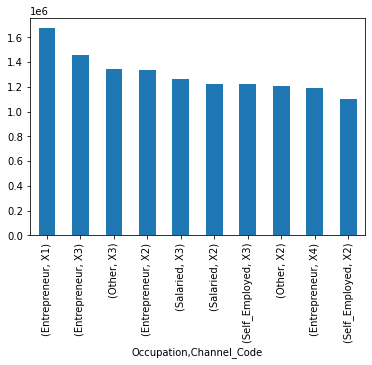

In [132]:
cc_data_train.groupby(['Occupation','Channel_Code']).Avg_Account_Balance.mean().sort_values(ascending=False)[:10].plot.bar()

    *Customers with occupation as Entrepreneurs acquired from channel code X1 have the highest avg account balance

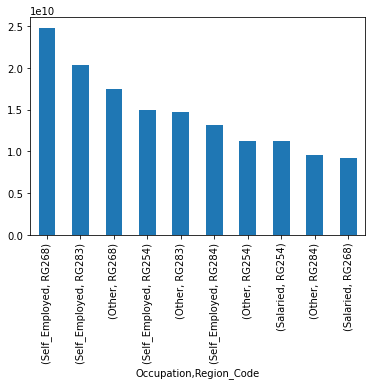

In [95]:
cc_data_train.groupby(['Occupation','Region_Code']).Avg_Account_Balance.sum().sort_values(ascending=False)[:10].plot.bar()

    * Customers with occupation as Self-employed and from region code RG 268 have comparatively highest avg account balance amongst others
    

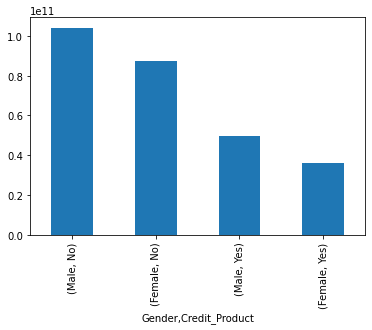

In [96]:
cc_data_train.groupby(['Gender','Credit_Product']).Avg_Account_Balance.sum().sort_values(ascending=False)[:10].plot.bar()

    *Male and female customers with no credit product have higher avg account balance than those customers wih active credit product

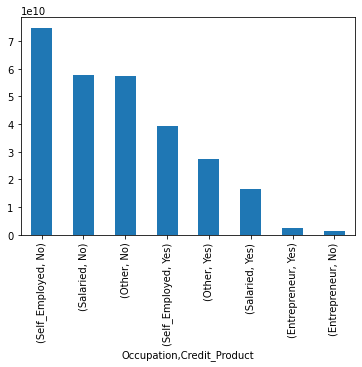

In [97]:
cc_data_train.groupby(['Occupation','Credit_Product']).Avg_Account_Balance.sum().sort_values(ascending=False)[:10].plot.bar()

    *customers with occupation as self employed and no active credit product have highest avg account balance as compared to customers from other occupation and different status of credit products

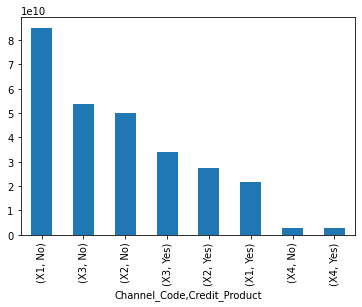

In [98]:
cc_data_train.groupby(['Channel_Code','Credit_Product']).Avg_Account_Balance.sum().sort_values(ascending=False)[:10].plot.bar()

    * Customers from channel code X1 with no active credit product have highest avg account balance.

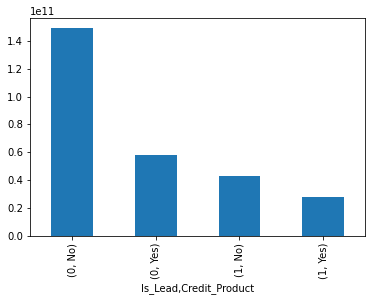

In [99]:
cc_data_train.groupby(['Is_Lead','Credit_Product']).Avg_Account_Balance.sum().sort_values(ascending=False)[:10].plot.bar()

    *Non interested customets with no active credit product have the highest avg account balance.
    Interested customers with active credit product have the lowest avg account balance amongst all.

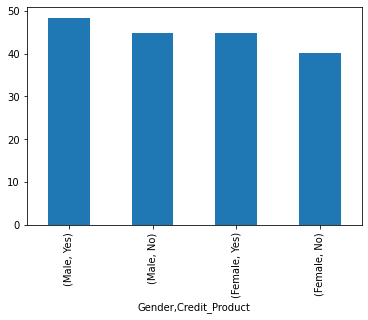

In [100]:
cc_data_train.groupby(['Gender','Credit_Product']).Age.mean().sort_values(ascending=False)[:10].plot.bar()

    *male customers with active credit product have avg age ~50

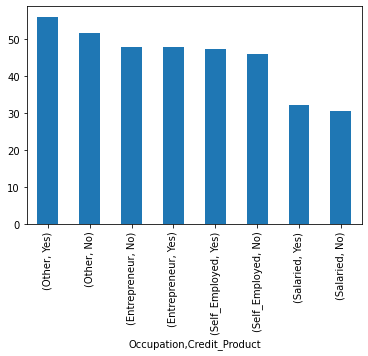

In [101]:
cc_data_train.groupby(['Occupation','Credit_Product']).Age.mean().sort_values(ascending=False)[:10].plot.bar()

    *Customers with occupation as Other and active credit product highest avg age of ~50

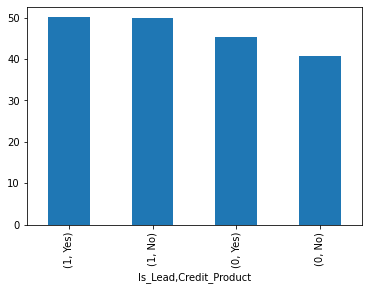

In [102]:
cc_data_train.groupby(['Is_Lead','Credit_Product']).Age.mean().sort_values(ascending=False)[:10].plot.bar()

    * Avg age of interested customers with active credit product is ~50 and higher than interested customers with non active credit product

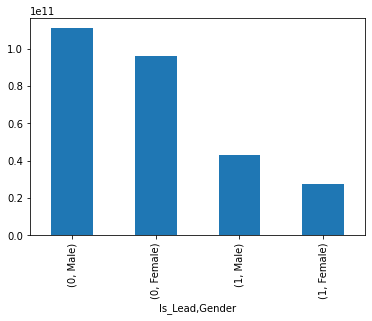

In [103]:
cc_data_train.groupby(['Is_Lead','Gender']).Avg_Account_Balance.sum().sort_values(ascending=False)[:10].plot.bar()

    Inferenc6e:
    Avg account balance of Interested Male customer is more than interested female customers

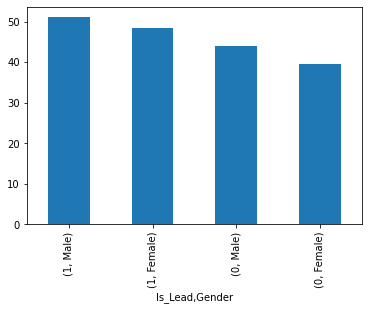

In [104]:
cc_data_train.groupby(['Is_Lead','Gender']).Age.mean().sort_values(ascending=False)[:10].plot.bar()

    Inferenc6e:
    1. Avg age of Male customers interested in c6redit card is 50
    2. Avg age 0f female customers interested in credit card is ~45
    

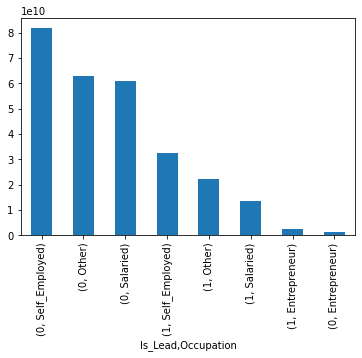

In [105]:
cc_data_train.groupby(['Is_Lead','Occupation']).Avg_Account_Balance.sum().sort_values(ascending=False)[:10].plot.bar()

    Inference:
       1. Customers (interested in credit card) who are self employed have highest average account balance when compared with Others,6 Salaried and Entrepreneurs.

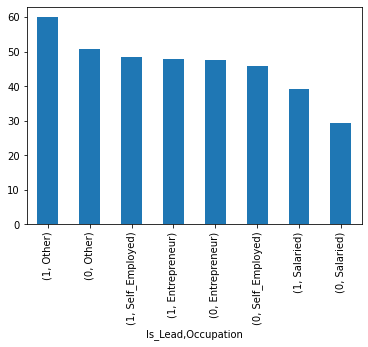

In [106]:
cc_data_train.groupby(['Is_Lead','Occupation']).Age.mean().sort_values(ascending=False)[:10].plot.bar()

    Inference:
    1. Avg age of customers who are interested in credit card belong to occupation - Others (60 yrs), Self employed & Entrepreneur (~50),  salaried (40).
    2. Avg age of Entrepreneur customers (with interest or withou interest in credit card ) is 50

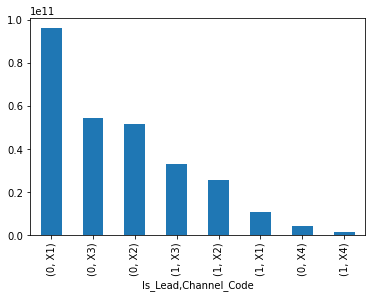

In [107]:
cc_data_train.groupby(['Is_Lead','Channel_Code']).Avg_Account_Balance.sum().sort_values(ascending=False)[:10].plot.bar()

    Inference:
    1. Avg account balance of customers wth channel codes - X3,X2,X4,6 who are interested in credit card  -is below 0.4e^11

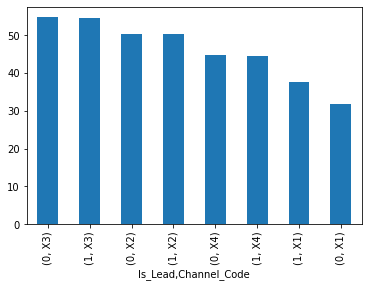

In [108]:
cc_data_train.groupby(['Is_Lead','Channel_Code']).Age.mean().sort_values(ascending=False)[:10].plot.bar()

    Inference:
    1. Customers with Channel codes-X3,X2,x4 and interested in credit card, belong to age group of 40 and 50. 

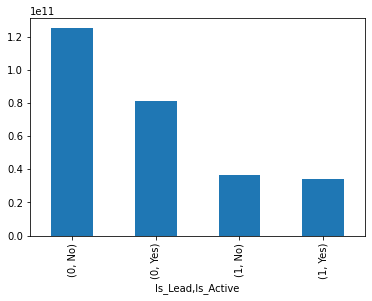

In [109]:
cc_data_train.groupby(['Is_Lead','Is_Active']).Avg_Account_Balance.sum().sort_values(ascending=False)[:10].plot.bar()

    Inference:
    1. Customers who were active (in last 3 months) and interested in a Credit card - have the lowest average account balance
    2.  Customers who are neither active nor interested in a credit card - have the highest average account balance.
    

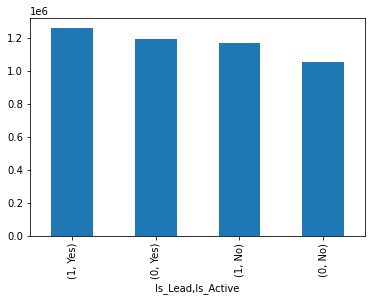

In [110]:
cc_data_train.groupby(['Is_Lead','Is_Active']).Avg_Account_Balance.mean().sort_values(ascending=False)[:10].plot.bar()

    *Active and interested customers hve higher avg account balance as compared to interested and inactive customers

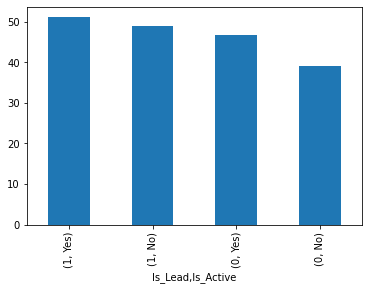

In [111]:
cc_data_train.groupby(['Is_Lead','Is_Active']).Age.mean().sort_values(ascending=False)[:10].plot.bar()

    Inference:
    1. <Majority> Average age of Customers who were active in last 3 months, were interested towards credit card is 50.
    2. Average age of Customers who were not active in last 3 months,yet were interested in credit card is ~50.
    3. Average age of Customers who were neither active nor interested are below 40.

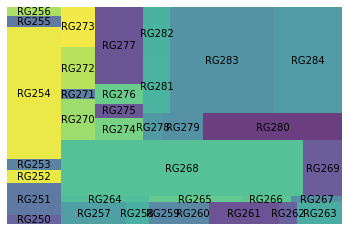

In [112]:
a = cc_data_train.groupby('Region_Code')[['Is_Lead']].sum().index.get_level_values(0).tolist()
d = cc_data_train.groupby('Region_Code')[['Is_Lead']].sum().reset_index().Is_Lead.values.tolist()
squarify.plot(sizes=d,label=a, alpha=.8 )
plt.axis('off')
plt.show()